# Project - Data Mining

## Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

### 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline

In [4]:
Bank=pd.read_csv("bank_marketing_part1_Data.csv")

In [5]:
Bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [6]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [7]:
Bank.shape

(210, 7)

In [8]:
Bank.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
Bank.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [213]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], color='g');
    plt.show()
    
    plt.figure()
    print("histplot of " + column)
    print("----------------------------------------------------------------------------")
    ax = plt.hist(x=df[column])
    plt.show()

In [214]:
df_num = Bank.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 Distribution of spending
----------------------------------------------------------------------------


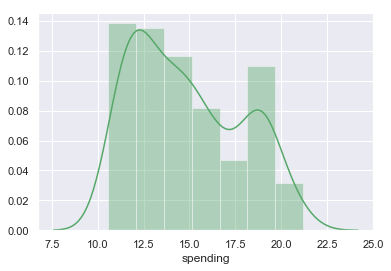

histplot of spending
----------------------------------------------------------------------------


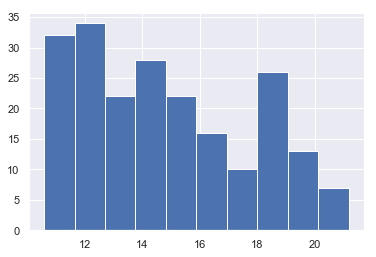

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 Distribution of advance_payments
----------------------------------------------------------------------------


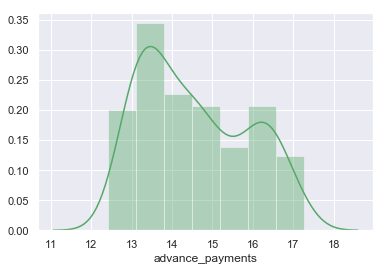

histplot of advance_payments
----------------------------------------------------------------------------


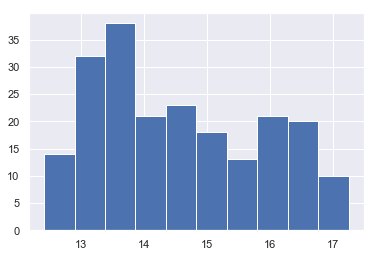

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.871025
std        0.023560
min        0.810588
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 Distribution of probability_of_full_payment
----------------------------------------------------------------------------


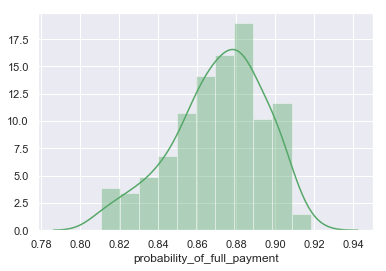

histplot of probability_of_full_payment
----------------------------------------------------------------------------


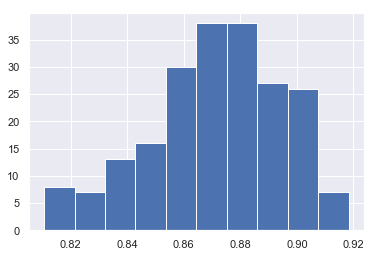

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 Distribution of current_balance
----------------------------------------------------------------------------


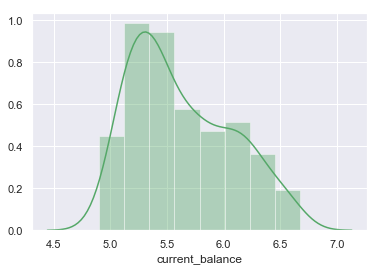

histplot of current_balance
----------------------------------------------------------------------------


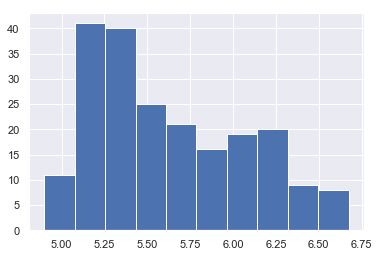

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 Distribution of credit_limit
----------------------------------------------------------------------------


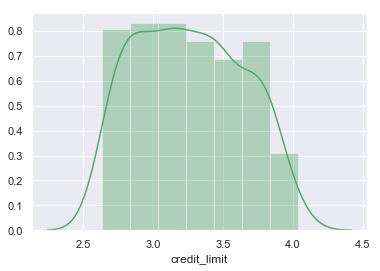

histplot of credit_limit
----------------------------------------------------------------------------


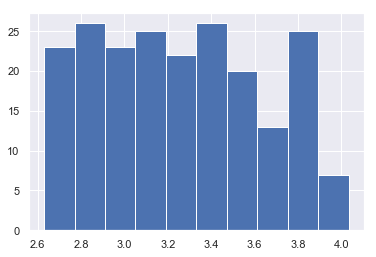

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.697288
std        1.494689
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.079625
Name: min_payment_amt, dtype: float64 Distribution of min_payment_amt
----------------------------------------------------------------------------


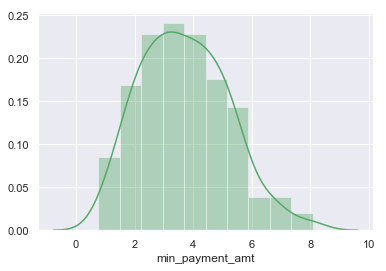

histplot of min_payment_amt
----------------------------------------------------------------------------


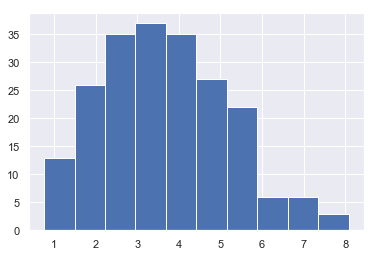

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


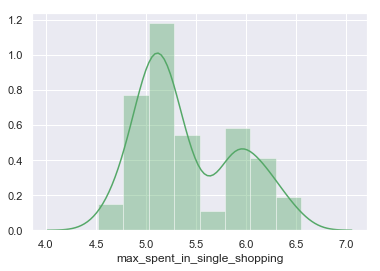

histplot of max_spent_in_single_shopping
----------------------------------------------------------------------------


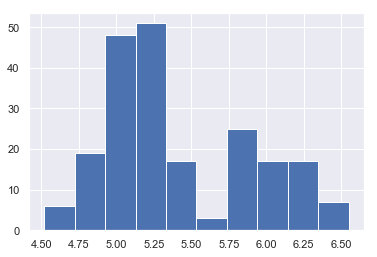

max_spent_in_single_shopping


In [215]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)
print(x)

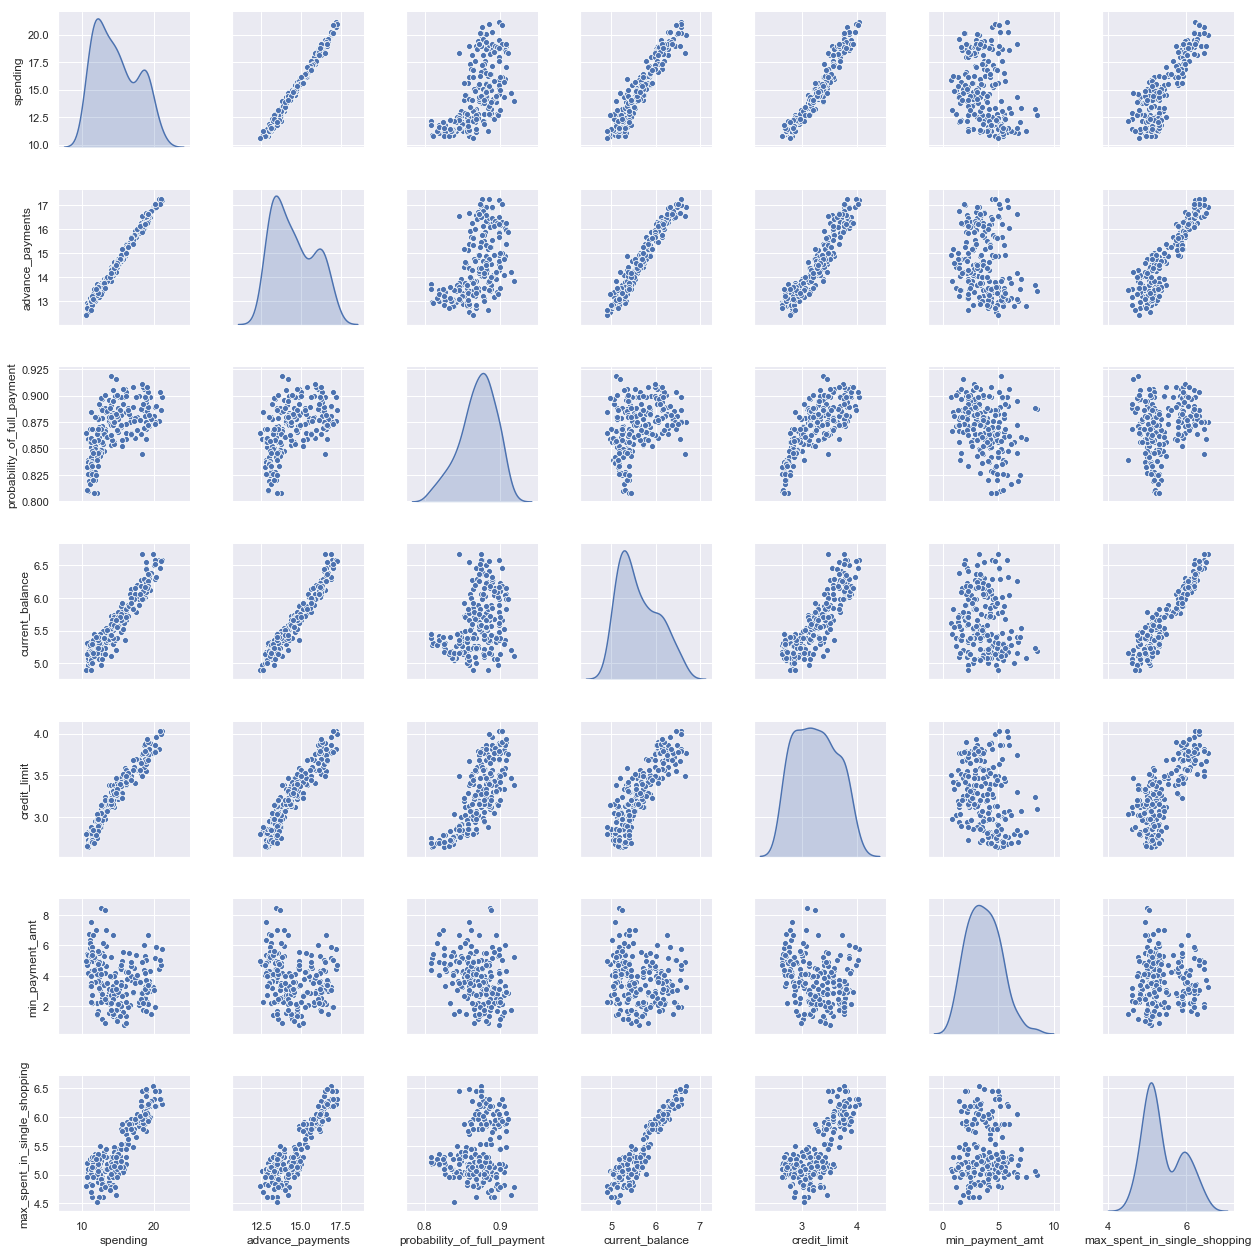

In [10]:
sns.pairplot(Bank,diag_kind='kde');

In [11]:
Bank.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


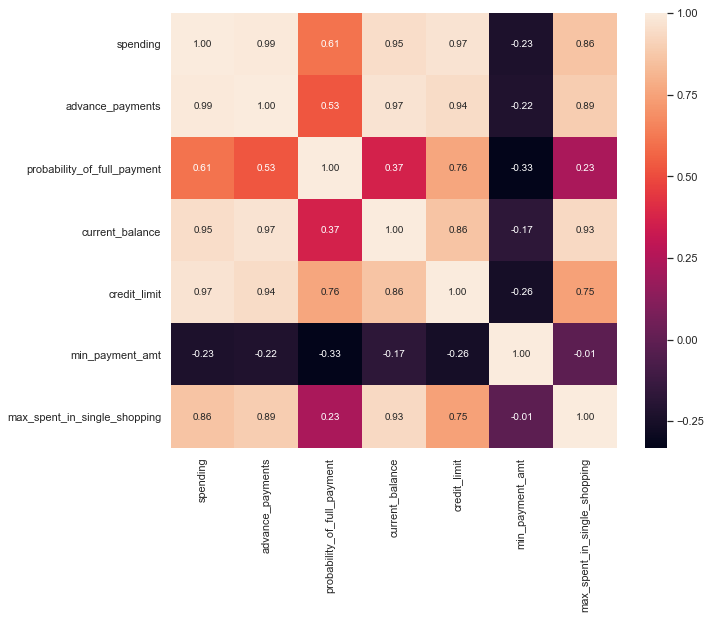

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(Bank.corr(),annot=True,fmt=".2f");

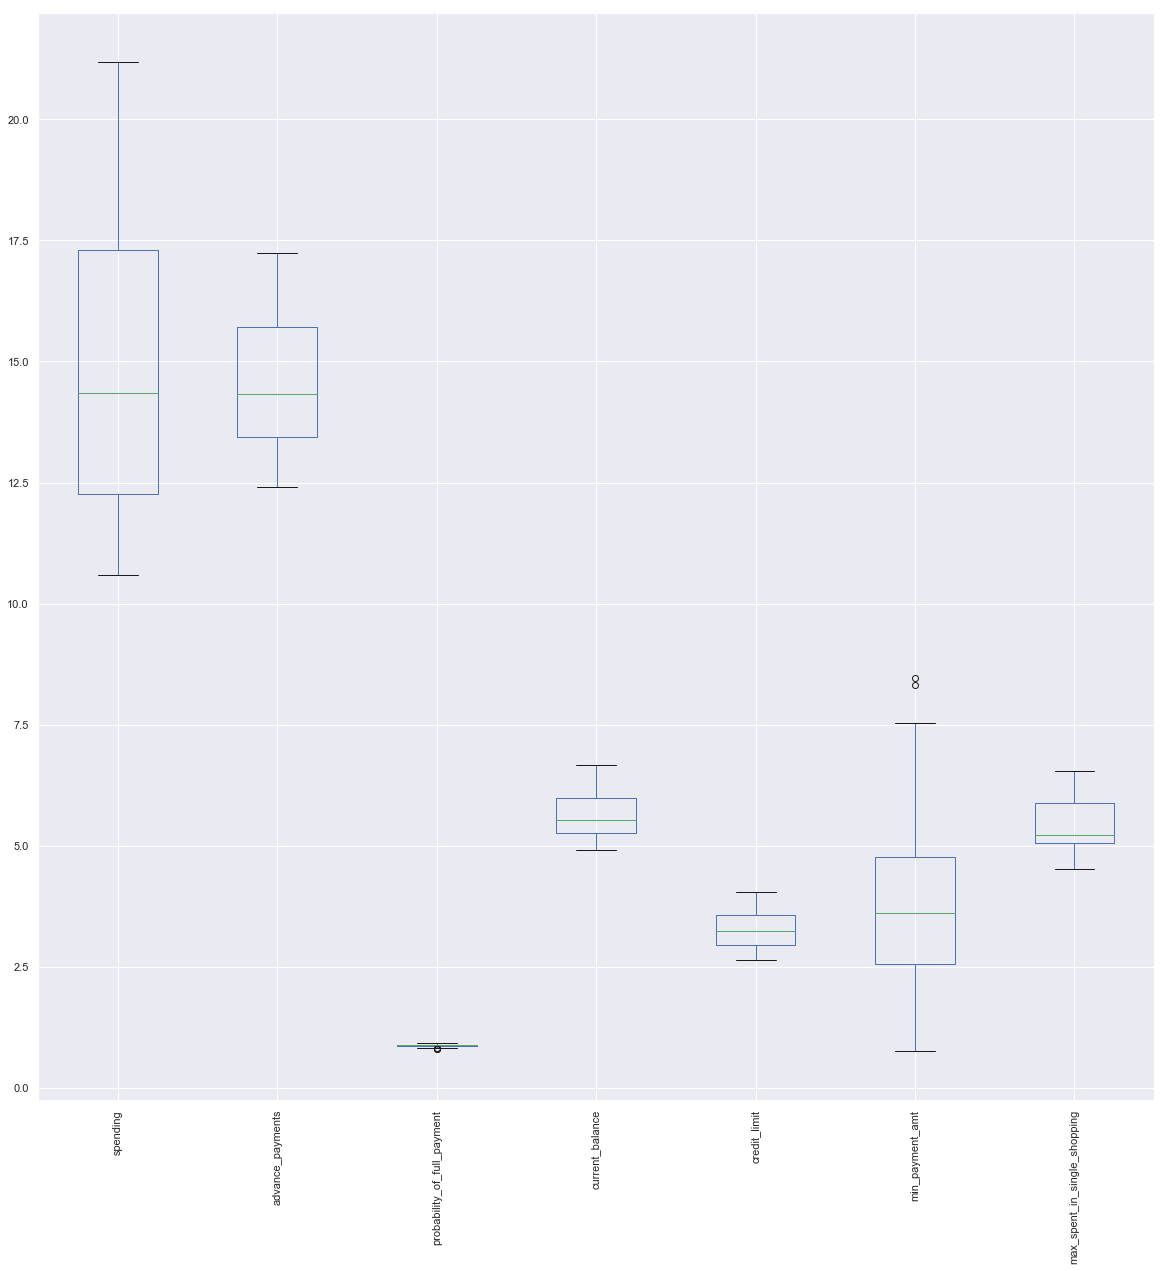

In [13]:
Bank.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

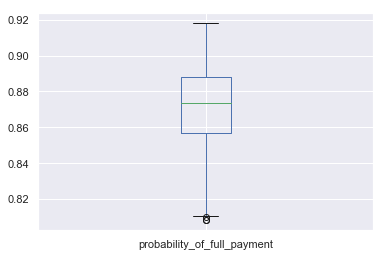

In [14]:
Bank.boxplot(column=['probability_of_full_payment'])
plt.show()

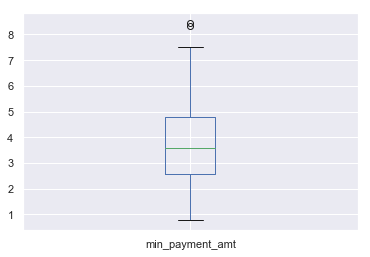

In [15]:
Bank.boxplot(column=['min_payment_amt'])
plt.show()

In [16]:
df=Bank.copy()

In [17]:
def replace_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    return lower_limit,upper_limit

In [18]:
lrprobability_of_full_payment,urprobability_of_full_payment=replace_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>urprobability_of_full_payment,urprobability_of_full_payment,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrprobability_of_full_payment,lrprobability_of_full_payment,df['probability_of_full_payment'])
lrmin_payment_amt,urmin_payment_amt=replace_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urmin_payment_amt,urmin_payment_amt,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lrmin_payment_amt,lrmin_payment_amt,df['min_payment_amt'])



In [19]:
print(lrprobability_of_full_payment,urprobability_of_full_payment)
print(lrmin_payment_amt,urmin_payment_amt)


0.8105875 0.9340875
-0.7493750000000006 8.079625


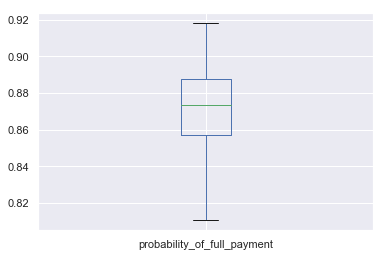

In [20]:
df.boxplot(column=['probability_of_full_payment'])
plt.show()

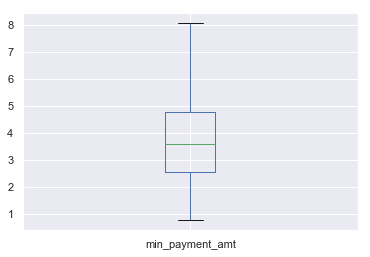

In [21]:
df.boxplot(column=['min_payment_amt'])
plt.show()

In [22]:
Bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


### 1.2  Do you think scaling is necessary for clustering in this case? Justify

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler() 
scaled=scaler.fit_transform(df)
scaled

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
link_method = linkage(df, method = 'average')

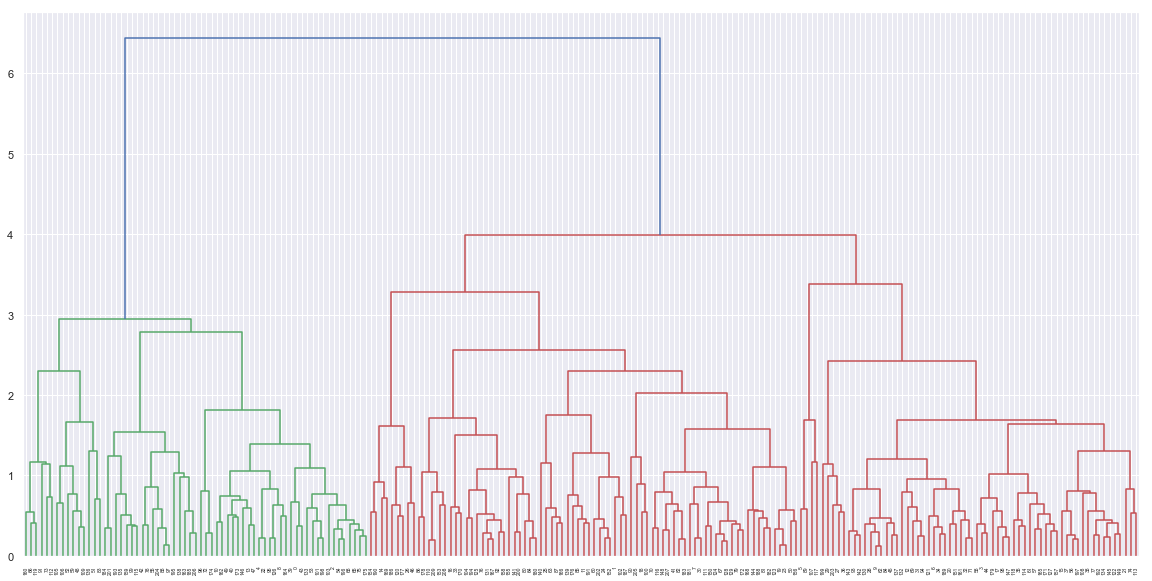

In [216]:
plt.figure(figsize=(20,10))
dend = dendrogram(link_method)

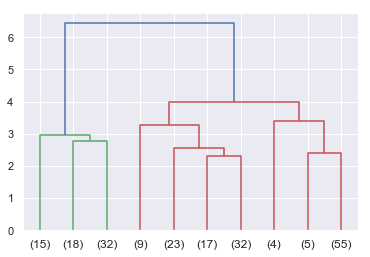

In [28]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

In [29]:
from scipy.cluster.hierarchy import fcluster

In [30]:
clusters=fcluster(link_method,3,criterion="maxclust")
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 2, 2, 3, 3,
       1, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 2, 2, 1, 3, 2, 2, 2,
       1, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1,
       2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 1, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [31]:
clusters_data=Bank.copy()
kmean_dataset=Bank.copy()

In [32]:
clusters_data['clusters']=clusters
clusters_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [33]:
clusters_data['clusters'].value_counts().sort_index()

1    65
2    81
3    64
Name: clusters, dtype: int64

In [34]:
aggdata=clusters_data.groupby('clusters').mean()
aggdata['Freq']=clusters_data['clusters'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.569231,16.235077,0.884386,6.183723,3.705569,3.636262,6.047231,65
2,14.232716,14.261358,0.877623,5.500580,3.221778,2.679249,5.136136,81
3,11.845781,13.234375,0.849017,5.226609,2.851266,5.057281,5.103094,64


### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [35]:
from sklearn.cluster import KMeans 

In [36]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled)
k_means.inertia_

1470.0

In [37]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled)
k_means.inertia_

659.1474009548498

In [38]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled)
k_means.inertia_

430.2984817512229

In [39]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled)
k_means.inertia_

370.69092922102016

In [40]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled)
k_means.inertia_

326.8846407681857

In [41]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled)
labels = k_means.labels_
labels

array([3, 0, 3, 2, 3, 2, 2, 0, 3, 2, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 2, 2,
       3, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 3, 3, 0, 1, 3,
       2, 2, 0, 3, 3, 3, 2, 3, 3, 3, 3, 1, 2, 2, 2, 3, 0, 2, 2, 1, 0, 3,
       3, 0, 3, 0, 0, 2, 3, 3, 2, 3, 0, 2, 1, 0, 0, 0, 0, 3, 2, 1, 1, 1,
       1, 2, 0, 3, 0, 2, 0, 3, 3, 1, 2, 1, 0, 3, 1, 3, 0, 3, 3, 2, 0, 3,
       1, 0, 3, 2, 2, 1, 0, 0, 2, 3, 0, 2, 2, 2, 0, 0, 3, 2, 0, 0, 2, 0,
       0, 3, 2, 3, 3, 2, 1, 0, 1, 0, 2, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 1, 3, 2, 3, 1, 3, 2, 1, 0, 0, 2, 0, 2, 0, 3, 3, 3,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 3, 0, 1, 3, 2,
       3, 2, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1])

In [42]:
wss=[]

In [43]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df)
    wss.append(KM.inertia_)

In [44]:
wss

[2714.29465865745,
 1006.3797324601994,
 583.0543371471394,
 467.38757531847295,
 382.35664705946704,
 320.11962676840267,
 275.6629277320736,
 238.13453281365778,
 214.69868021311498,
 198.0791803623218]

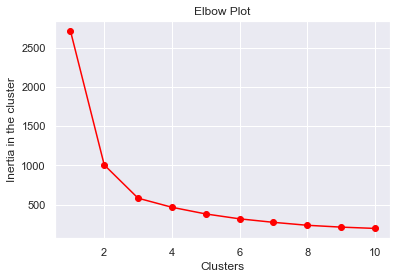

In [45]:
plt.plot(range(1,11), wss,marker='o',color='red');
plt.title('Elbow Plot')
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [46]:
kmean_dataset["Clus_kmeans"] = labels
kmean_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,3
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,3
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,3


In [47]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
silhouette_score(scaled,labels)

0.32783548276481184

In [49]:
from sklearn import metrics

In [50]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(scaled)
    scores.append(metrics.silhouette_score(scaled, km.labels_))
    
scores

[0.46560100442748986,
 0.4008059221522216,
 0.32943733699973826,
 0.28331581604237704,
 0.29008748137211443,
 0.27924385297493454,
 0.2638089896766218,
 0.2583926120522323,
 0.26637561394383974]

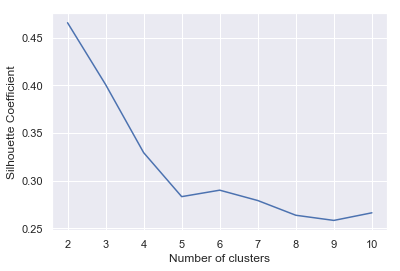

In [51]:
plt.plot(k_range,scores);
plt.xlabel("Number of clusters");
plt.ylabel("Silhouette Coefficient");

## Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

### 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [52]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [53]:
ins_df=pd.read_csv("insurance_part2_data.csv")

In [54]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [57]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [58]:
ins_df.shape

(3000, 10)

In [55]:
ins_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [59]:
ins_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [60]:
ins_df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [66]:
dup =ins_df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 139


In [67]:
ins_df[dup]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.00,Online,27,60.00,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.00,Online,5,20.00,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.00,Online,11,19.00,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.00,Online,5,20.00,Customised Plan,ASIA
473,36,EPX,Travel Agency,No,0.00,Online,26,24.00,Customised Plan,ASIA
524,36,EPX,Travel Agency,No,0.00,Online,3,10.00,Cancellation Plan,ASIA
540,33,C2B,Airlines,Yes,54.00,Online,365,216.00,Silver Plan,ASIA
567,36,EPX,Travel Agency,No,0.00,Online,19,20.00,Customised Plan,ASIA
569,36,EPX,Travel Agency,No,0.00,Online,14,20.00,Customised Plan,ASIA


In [68]:
ins_df.drop_duplicates(inplace=True)
dup=ins_df.duplicated()
print('Number of duplicate rows = %d'%(dup.sum()))

Number of duplicate rows = 0


In [69]:
ins_df.shape

(2861, 10)

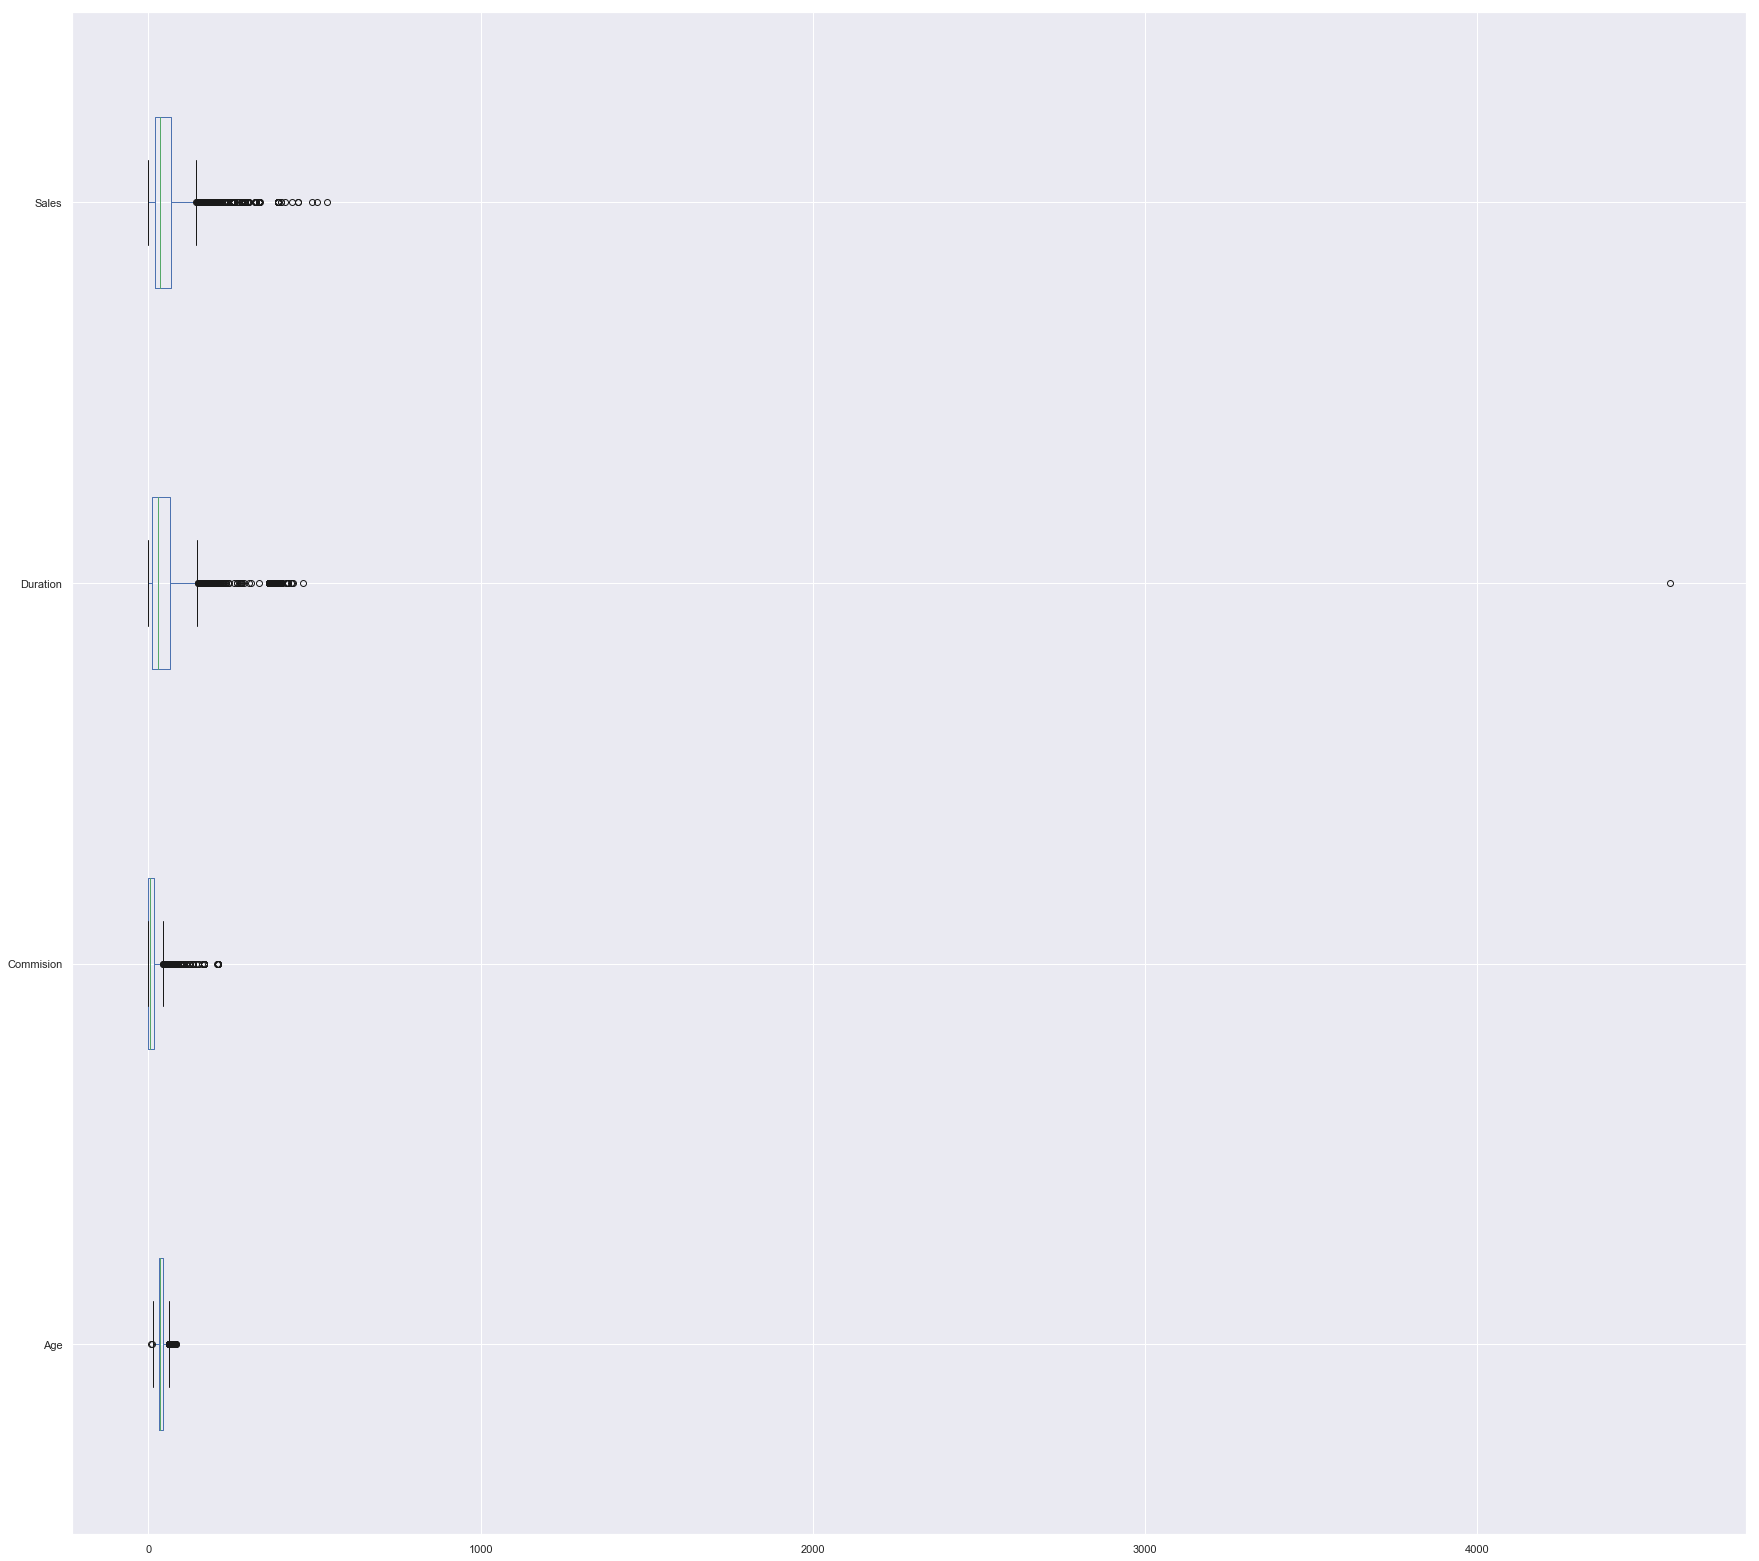

In [82]:
ins_df.boxplot(figsize=(30,28),vert=False)


#### continuous variables

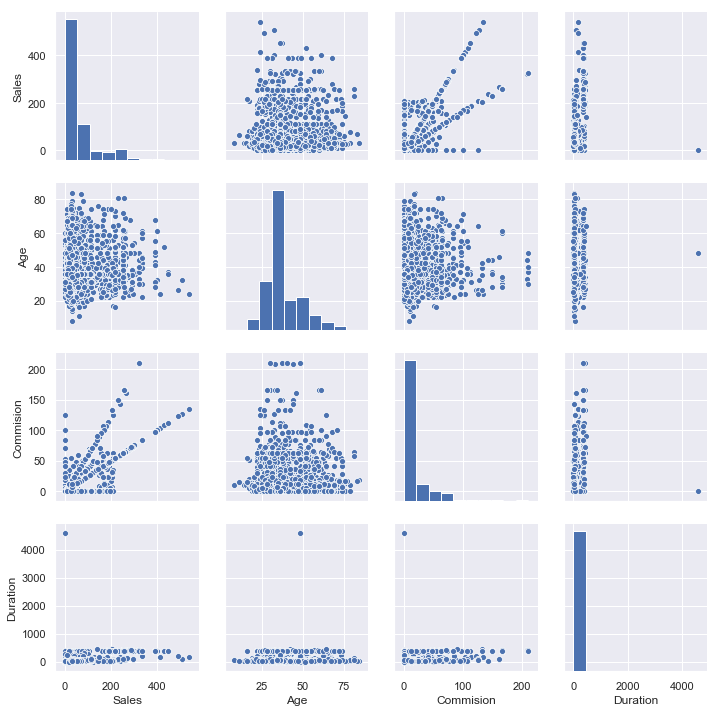

In [88]:
sns.pairplot(ins_df[['Sales','Age','Commision','Duration']]);


#### Categorical Variables

In [133]:
def category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts())
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()

    
    print("       ")

In [134]:
df_cat = ins_df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

Details of Agency_Code
----------------------------------------------------------------
EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64


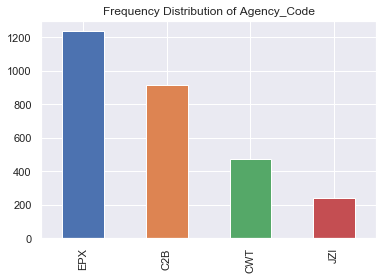

       
Details of Type
----------------------------------------------------------------
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64


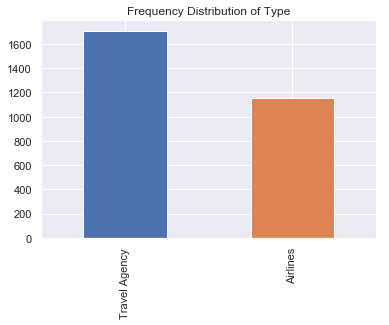

       
Details of Claimed
----------------------------------------------------------------
No     1947
Yes     914
Name: Claimed, dtype: int64


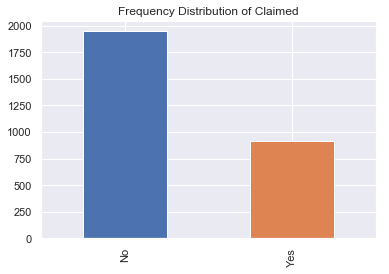

       
Details of Channel
----------------------------------------------------------------
Online     2815
Offline      46
Name: Channel, dtype: int64


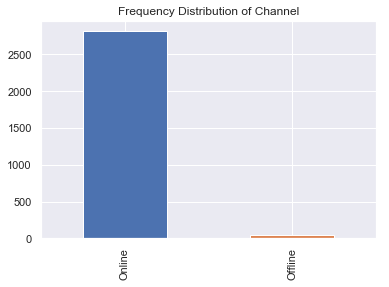

       
Details of Product Name
----------------------------------------------------------------
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64


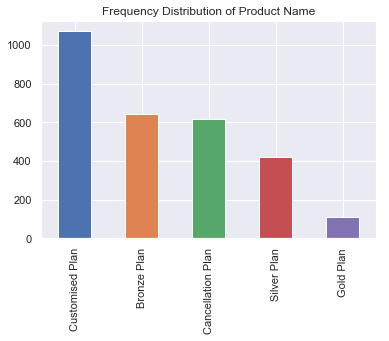

       
Details of Destination
----------------------------------------------------------------
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64


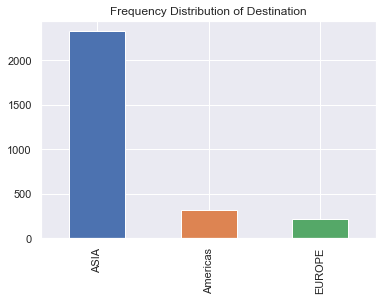

In [135]:
for x in lstcatcolumns:
    category(x)

In [142]:
def box_category(cat_column):
    sns.boxplot(data=df_cat,x=df_cat[cat_column],y=ins_df['Sales'],hue='Claimed')
    print("       ")
    plt.show()

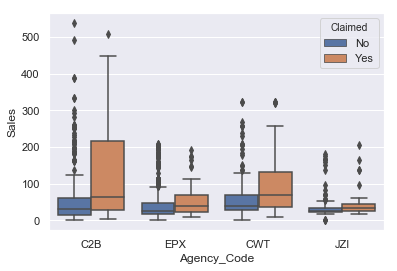

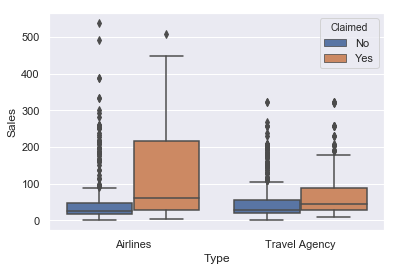

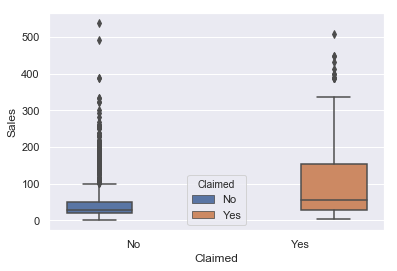

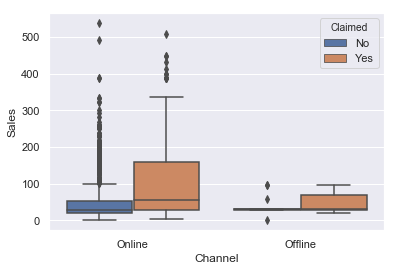

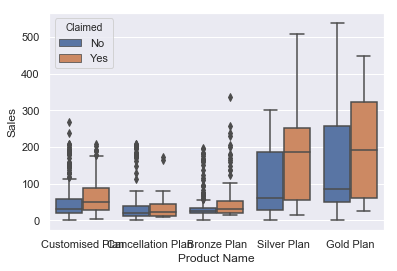

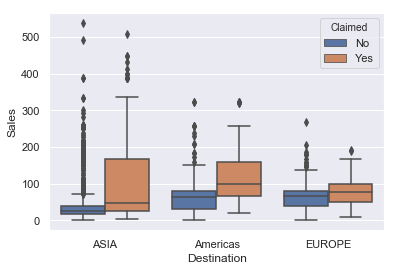

In [143]:
for x in lstcatcolumns:
    box_category(x)

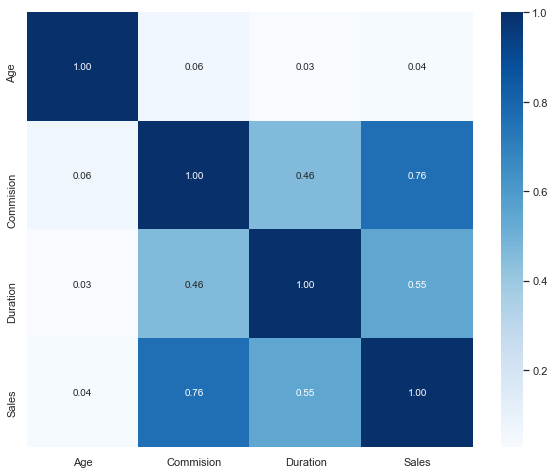

In [144]:
plt.figure(figsize=(10,8))
sns.heatmap(ins_df.corr(),annot=True,fmt=".2f",cmap='Blues');

In [145]:
ins_df.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027457,0.036187
Commision,0.064759,1.000000,0.462114,0.762181
Duration,0.027457,0.462114,1.000000,0.549889
Sales,0.036187,0.762181,0.549889,1.000000


In [146]:
for feature in ins_df.columns: 
    if ins_df[feature].dtype == 'object':
        ins_df[feature] = pd.Categorical(ins_df[feature]).codes

In [147]:
ins_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [148]:
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
Age             2861 non-null int64
Agency_Code     2861 non-null int8
Type            2861 non-null int8
Claimed         2861 non-null int8
Commision       2861 non-null float64
Channel         2861 non-null int8
Duration        2861 non-null int64
Sales           2861 non-null float64
Product Name    2861 non-null int8
Destination     2861 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.5 KB


### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [149]:
ins_df.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [150]:
X = ins_df.drop("Claimed" , axis=1)

y = ins_df.pop("Claimed")

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)


In [152]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [153]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [154]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [155]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Tree_File = open('tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Tree_File.close()


In [156]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
Age           0.194480
Agency_Code   0.170796
Type          0.000220
Commision     0.073395
Channel       0.003908
Duration      0.281062
Sales         0.220926
Product Name  0.031672
Destination   0.023540


In [158]:
y_predict = dt_model.predict(X_test)
y_predict

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

#### Regularising the Decision Tree

In [159]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [160]:
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
Age           0.194480
Agency_Code   0.170796
Type          0.000220
Commision     0.073395
Channel       0.003908
Duration      0.281062
Sales         0.220926
Product Name  0.031672
Destination   0.023540


In [161]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [162]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.58      0.65       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [163]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       588
           1       0.66      0.57      0.61       271

    accuracy                           0.77       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.77      0.77      0.77       859



#### Building a Random Forest Classifier

In [165]:
rfcl=RandomForestClassifier(n_estimators=500,
                            oob_score=True,
                            max_depth=10,
                            max_features=5,
                            min_samples_leaf=21,
                            min_samples_split=60)

In [167]:
rfcl.fit(X_train,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [168]:
rfcl.oob_score_

0.7642357642357642

In [169]:
param_grid={'n_estimators':[301,501],'max_depth':[10,20],'min_samples_leaf':[21,22],'min_samples_split':[60,70],
            'max_features':[5,6],
}

In [170]:
rfcl=RandomForestClassifier()

In [171]:
grid_search=GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [173]:
grid_search.fit(X_train,train_labels)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [174]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 6,
 'min_samples_leaf': 21,
 'min_samples_split': 70,
 'n_estimators': 501}

In [175]:
best_grid=grid_search.best_estimator_

In [176]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=21, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [178]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [179]:
confusion_matrix(train_labels,ytrain_predict)


array([[1217,  142],
       [ 272,  371]], dtype=int64)

In [180]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1359
           1       0.72      0.58      0.64       643

    accuracy                           0.79      2002
   macro avg       0.77      0.74      0.75      2002
weighted avg       0.79      0.79      0.79      2002



In [181]:
confusion_matrix(test_labels,ytest_predict)


array([[521,  67],
       [120, 151]], dtype=int64)

In [182]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       588
           1       0.69      0.56      0.62       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.78       859



#### Building a Neural Network Classifier

In [183]:
sc=StandardScaler()

In [185]:
X_train=sc.fit_transform(X_train)

In [186]:
X_train

array([[ 2.88764239, -1.2626112 , -1.19813318, ..., -0.65375471,
        -1.31338076, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.37032806,
         0.24339146, -0.44775345],
       [ 2.04101412, -0.27289013,  0.83463176, ...,  0.11574864,
         0.24339146,  1.24676906],
       ...,
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.68209737,
        -0.53499465, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ...,  0.72086453,
         0.24339146,  1.24676906]])

In [187]:
X_test=sc.transform(X_test)

In [188]:
X_test

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50829455,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.45535606,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.32406723,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.63958338,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.56872671,
         0.24339146, -0.44775345]])

In [193]:
param_grid={'hidden_layer_sizes': [520,100,500],
            'max_iter':[2500,3000],
            'solver': ['adam'],
            'tol': [0.01]
            ,}
nncl=MLPClassifier(random_state=1)
grid_search=GridSearchCV(estimator=nncl,param_grid=param_grid,cv=10)

In [194]:
grid_search.fit(X_train,train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [195]:
best_grid=grid_search.best_estimator_
best_grid

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.01, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [197]:
ytrain_predict=best_grid.predict(X_train)
ytest_predict=best_grid.predict(X_test)

In [198]:
confusion_matrix(train_labels,ytrain_predict)

array([[1159,  200],
       [ 285,  358]], dtype=int64)

In [199]:
nn_train_acc=best_grid.score(X_train,train_labels)
nn_train_acc

0.7577422577422578

In [200]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1359
           1       0.64      0.56      0.60       643

    accuracy                           0.76      2002
   macro avg       0.72      0.70      0.71      2002
weighted avg       0.75      0.76      0.75      2002



In [201]:
confusion_matrix(test_labels,ytest_predict)

array([[511,  77],
       [122, 149]], dtype=int64)

In [202]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7683352735739232

In [203]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       588
           1       0.66      0.55      0.60       271

    accuracy                           0.77       859
   macro avg       0.73      0.71      0.72       859
weighted avg       0.76      0.77      0.76       859



### 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 